#VPCA Crop Residue Estimation

The code calculates aeverage relectance, interpolates the 1nm reflectance to 10nm and computes first derivatives. The code also exports derivative data to excel file.



**We begin by importing relevant packages**

In [6]:

##operational packages

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

##visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Mounted at /content/gdrive


#Loading Data into Google Colab

***We want to load the excel book and call each worksheet.
This saves us time from saving each worksheet seperately as a .csv file***

If you want to do instrument offset correction, you can do them before uploading the excel sheet. Also,before uploading the data, make sure to remove the bands with atmospheric noise. I have a seperate code the corrects the instrument offset

In [7]:
VPCA = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/Corrected_Spring24_Data/VPCA_Scores.xlsx')
scores = pd.read_excel(VPCA, 'VPCA_Scores')

In [3]:
scores

,Sample,sample type,6VPCA Score 1,6VPCA Score 2,6VPCA Score 3,6VPCA Score 4,6VPCA Score 5,6VPCA Score 6
0,KB-5,Corn Res,0.58711,1.45673,-0.78512,0.95528,0.85001,1.35848
1,KB-3,Corn Res,0.47937,1.42302,-0.83547,1.16594,0.95517,0.77655
2,KB-1,Corn Res,0.51947,1.47856,-0.84628,1.32242,1.13929,0.74541
3,JB-5,Corn Res,0.22135,0.59156,-0.27654,-0.63017,0.09259,0.34682
4,JB-4,Corn Res,-0.36003,-0.36478,-1.54492,-1.79321,-1.13306,0.53164
...,...,...,...,...,...,...,...,...
57,JanD-S9,Weeds,-0.20803,-1.18310,0.10094,0.00556,1.22714,0.34596
58,ZachA-12,Wheat,-0.18920,-1.28749,-0.23878,0.01147,0.45827,0.27256
59,ZachA-11,Wheat,-7.21512,1.88189,1.33297,0.51429,0.75214,0.61856
60,KB-5,Wheat,-0.26773,-1.34868,-0.64563,-0.80697,0.61665,0.38074


In [23]:
scores_res = scores [scores['sample type'].str.contains('Corn Res')]
scores_res

,Sample,sample type,6VPCA Score 1,6VPCA Score 2,6VPCA Score 3,6VPCA Score 4,6VPCA Score 5,6VPCA Score 6
0,KB-5,Corn Res,0.58711,1.45673,-0.78512,0.95528,0.85001,1.35848
1,KB-3,Corn Res,0.47937,1.42302,-0.83547,1.16594,0.95517,0.77655
2,KB-1,Corn Res,0.51947,1.47856,-0.84628,1.32242,1.13929,0.74541
3,JB-5,Corn Res,0.22135,0.59156,-0.27654,-0.63017,0.09259,0.34682
4,JB-4,Corn Res,-0.36003,-0.36478,-1.54492,-1.79321,-1.13306,0.53164
5,JB-3,Corn Res,0.10088,0.33024,-0.12889,-0.98110,-0.49311,0.21719
6,JB-2,Corn Res,0.68073,0.99558,1.91077,-0.37851,0.29252,-0.04124
7,JB-1,Corn Res,0.71224,1.24818,0.79963,0.21658,0.96426,0.23944
8,JanD-S9,Corn Res,0.26717,0.69057,-0.86472,0.33886,0.03211,0.98996
9,JanD-S8,Corn Res,0.79154,1.46062,-0.46650,0.25406,0.10170,2.98642


In [35]:
JanD_res = scores_res[scores_res["Sample"].str.contains("JanD")].sort_values(by="Sample", ascending = True)
JanD_res

,Sample,sample type,6VPCA Score 1,6VPCA Score 2,6VPCA Score 3,6VPCA Score 4,6VPCA Score 5,6VPCA Score 6
9,JanD-S8,Corn Res,0.79154,1.46062,-0.46650,0.25406,0.10170,2.98642
8,JanD-S9,Corn Res,0.26717,0.69057,-0.86472,0.33886,0.03211,0.98996


In [36]:
JB_KB_res = scores_res[0:8].sort_values("Sample", ascending = True)
JB_KB_res

,Sample,sample type,6VPCA Score 1,6VPCA Score 2,6VPCA Score 3,6VPCA Score 4,6VPCA Score 5,6VPCA Score 6
7,JB-1,Corn Res,0.71224,1.24818,0.79963,0.21658,0.96426,0.23944
6,JB-2,Corn Res,0.68073,0.99558,1.91077,-0.37851,0.29252,-0.04124
5,JB-3,Corn Res,0.10088,0.33024,-0.12889,-0.98110,-0.49311,0.21719
4,JB-4,Corn Res,-0.36003,-0.36478,-1.54492,-1.79321,-1.13306,0.53164
3,JB-5,Corn Res,0.22135,0.59156,-0.27654,-0.63017,0.09259,0.34682
2,KB-1,Corn Res,0.51947,1.47856,-0.84628,1.32242,1.13929,0.74541
1,KB-3,Corn Res,0.47937,1.42302,-0.83547,1.16594,0.95517,0.77655
0,KB-5,Corn Res,0.58711,1.45673,-0.78512,0.95528,0.85001,1.35848


In [37]:
res_lw = scores [scores['sample type'].str.contains('CornRes')].sort_values(by = 'Sample', ascending = True)
res_lw

,Sample,sample type,6VPCA Score 1,6VPCA Score 2,6VPCA Score 3,6VPCA Score 4,6VPCA Score 5,6VPCA Score 6
15,LynnW-1,CornRes,0.79962,1.08088,0.03101,0.04077,1.19361,-1.85869
14,LynnW-2,CornRes,0.02326,0.36264,-1.17524,-0.62427,0.04059,0.55469
13,LynnW-3,CornRes,0.39453,0.93831,-0.94355,0.02916,0.77398,0.59516
12,LynnW-4,CornRes,0.58994,1.16021,-0.71404,0.52023,1.66768,-1.04353
11,LynnW-5,CornRes,0.13039,0.47146,-1.06606,-0.41610,0.06507,0.18301


In [39]:
scores_res_all = pd.concat([JB_KB_res,JanD_res ,res_lw])
scores_res_all

,Sample,sample type,6VPCA Score 1,6VPCA Score 2,6VPCA Score 3,6VPCA Score 4,6VPCA Score 5,6VPCA Score 6
7,JB-1,Corn Res,0.71224,1.24818,0.79963,0.21658,0.96426,0.23944
6,JB-2,Corn Res,0.68073,0.99558,1.91077,-0.37851,0.29252,-0.04124
5,JB-3,Corn Res,0.10088,0.33024,-0.12889,-0.98110,-0.49311,0.21719
4,JB-4,Corn Res,-0.36003,-0.36478,-1.54492,-1.79321,-1.13306,0.53164
3,JB-5,Corn Res,0.22135,0.59156,-0.27654,-0.63017,0.09259,0.34682
2,KB-1,Corn Res,0.51947,1.47856,-0.84628,1.32242,1.13929,0.74541
1,KB-3,Corn Res,0.47937,1.42302,-0.83547,1.16594,0.95517,0.77655
0,KB-5,Corn Res,0.58711,1.45673,-0.78512,0.95528,0.85001,1.35848
9,JanD-S8,Corn Res,0.79154,1.46062,-0.46650,0.25406,0.10170,2.98642
8,JanD-S9,Corn Res,0.26717,0.69057,-0.86472,0.33886,0.03211,0.98996


In [4]:
residue = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/crop_residue_spring_2023.xlsx')

In [11]:
residue.sheet_names

['LW', 'JB_KB', 'Fall', 'JanD']

In [8]:
lw = pd.read_excel(residue, "LW")
lw

,AC001,site,Sample or Bag #,dry weight g,Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,Unnamed: 8,Unnamed: 9,bag weight (g),g/m2
0,LW,HWHF22_01,127,165.3,2023-04-19,NaN,0.0625,NaN,NaN,NaN,29.7,2169.6
1,LW,HWHF22_02,128,217.5,2023-04-19,NaN,0.0625,NaN,NaN,NaN,29.8,3003.2
2,LW,HWHF22_03,126,196.5,2023-04-19,NaN,0.0625,NaN,NaN,NaN,30.1,2662.4
3,LW,HWHF22_04,124,256.8,2023-04-19,NaN,0.0625,NaN,NaN,NaN,29.6,3635.2
4,LW,HWHF22_05,125,225.4,2023-04-19,NaN,0.0625,NaN,NaN,NaN,30.2,3123.2


In [12]:
JanD = pd.read_excel(residue, "JanD")
JanD

,Bag#,site,Sample or Bag #,dry weight+ bag (g),Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,researcher,bag no,bag weight (g),g/m2,Unnamed: 12
0,NaN,JanD,HWHF22_06,46.37,2023-11-13,NaN,0.0625,"dry crop residue (soy current year, a little c...",SE,NaN,23.01,373.76,"soy/corn residue, medium light duty brown bag,..."
1,NaN,JanD,HWHF22_07,57.52,2023-11-13,NaN,0.0625,"dry crop residue (soy current year, a little c...",SE,NaN,23.01,552.16,"soy/corn residue, medium light duty brown bag,..."
2,NaN,JanD,HWHF22_08,61.71,2023-11-13,NaN,0.0625,"dry crop residue (soy current year, a little c...",SE,NaN,23.01,619.20,"soy/corn residue, medium light duty brown bag,..."
3,NaN,JanD,HWHF22_09,46.08,2023-11-13,NaN,0.0625,"dry crop residue (soy current year, a little c...",SE,NaN,23.01,369.12,"soy/corn residue, medium light duty brown bag,..."
4,NaN,JanD,HWHF22_10,59.29,2023-11-13,NaN,0.0625,"dry crop residue (soy current year, a little c...",SE,NaN,23.01,580.48,"soy/corn residue, medium light duty brown bag,..."


In [16]:
JB_KB = pd.read_excel(residue, "JB_KB").sort_values(by= "site", ascending = True )

JB_KB

,Bag#,site,Sample or Bag #,dry weight g,Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,Unnamed: 8,CW002,bag weight (g),g/m2
4,103,jb21,HWHF22_21,60.53,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,496.48
8,112,jb22,HWHF22_22,74.01,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.4,713.76
7,111,jb23,HWHF22_23,86.86,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.7,914.56
5,104,jb24,HWHF22_24,58.12,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.2,462.72
6,105,jb25,HWHF22_25,34.38,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,78.08
1,102,kb1,HWHF22_26,102.71,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,1171.36
3,122,kb2,HWHF22_27,108.65,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.1,1256.80
9,123,kb3,HWHF22_28,87.97,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.8,930.72
0,101,kb4,HWHF22_29,85.91,5/22/2023,see expt (5/30/2023) see page 5),0.0625,residue,NaN,NaN,29.7,899.36
2,121,kb5,HWHF22_30,72.89,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.1,684.64


In [42]:
residue_all = pd.concat([JB_KB,JanD, lw]).reset_index()
residue_all

,index,Bag#,site,Sample or Bag #,dry weight g,Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,Unnamed: 8,CW002,bag weight (g),g/m2,dry weight+ bag (g),researcher,bag no,Unnamed: 12,AC001,Unnamed: 9
0,4,103.0,jb21,HWHF22_21,60.53,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.50,496.48,NaN,NaN,NaN,NaN,NaN,NaN
1,8,112.0,jb22,HWHF22_22,74.01,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.40,713.76,NaN,NaN,NaN,NaN,NaN,NaN
2,7,111.0,jb23,HWHF22_23,86.86,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.70,914.56,NaN,NaN,NaN,NaN,NaN,NaN
3,5,104.0,jb24,HWHF22_24,58.12,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.20,462.72,NaN,NaN,NaN,NaN,NaN,NaN
4,6,105.0,jb25,HWHF22_25,34.38,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.50,78.08,NaN,NaN,NaN,NaN,NaN,NaN
5,1,102.0,kb1,HWHF22_26,102.71,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.50,1171.36,NaN,NaN,NaN,NaN,NaN,NaN
6,3,122.0,kb2,HWHF22_27,108.65,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.10,1256.80,NaN,NaN,NaN,NaN,NaN,NaN
7,9,123.0,kb3,HWHF22_28,87.97,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.80,930.72,NaN,NaN,NaN,NaN,NaN,NaN
8,0,101.0,kb4,HWHF22_29,85.91,5/22/2023,see expt (5/30/2023) see page 5),0.0625,residue,NaN,NaN,29.70,899.36,NaN,NaN,NaN,NaN,NaN,NaN
9,2,121.0,kb5,HWHF22_30,72.89,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.10,684.64,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
residue_selected = residue_all.drop([6,8,10,11,14])
residue_selected

,index,Bag#,site,Sample or Bag #,dry weight g,Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,Unnamed: 8,CW002,bag weight (g),g/m2,dry weight+ bag (g),researcher,bag no,Unnamed: 12,AC001,Unnamed: 9
0,4,103.0,jb21,HWHF22_21,60.53,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.50,496.48,NaN,NaN,NaN,NaN,NaN,NaN
1,8,112.0,jb22,HWHF22_22,74.01,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.40,713.76,NaN,NaN,NaN,NaN,NaN,NaN
2,7,111.0,jb23,HWHF22_23,86.86,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.70,914.56,NaN,NaN,NaN,NaN,NaN,NaN
3,5,104.0,jb24,HWHF22_24,58.12,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.20,462.72,NaN,NaN,NaN,NaN,NaN,NaN
4,6,105.0,jb25,HWHF22_25,34.38,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.50,78.08,NaN,NaN,NaN,NaN,NaN,NaN
5,1,102.0,kb1,HWHF22_26,102.71,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.50,1171.36,NaN,NaN,NaN,NaN,NaN,NaN
7,9,123.0,kb3,HWHF22_28,87.97,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.80,930.72,NaN,NaN,NaN,NaN,NaN,NaN
9,2,121.0,kb5,HWHF22_30,72.89,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.10,684.64,NaN,NaN,NaN,NaN,NaN,NaN
12,2,NaN,JanD,HWHF22_08,NaN,2023-11-13 00:00:00,NaN,0.0625,"dry crop residue (soy current year, a little c...",NaN,NaN,23.01,619.20,61.71,SE,NaN,"soy/corn residue, medium light duty brown bag,...",NaN,NaN
13,3,NaN,JanD,HWHF22_09,NaN,2023-11-13 00:00:00,NaN,0.0625,"dry crop residue (soy current year, a little c...",NaN,NaN,23.01,369.12,46.08,SE,NaN,"soy/corn residue, medium light duty brown bag,...",NaN,NaN


In [ ]:
residue_selected['g/m2']

Text(0.5, 0, 'VPCA Score 6')

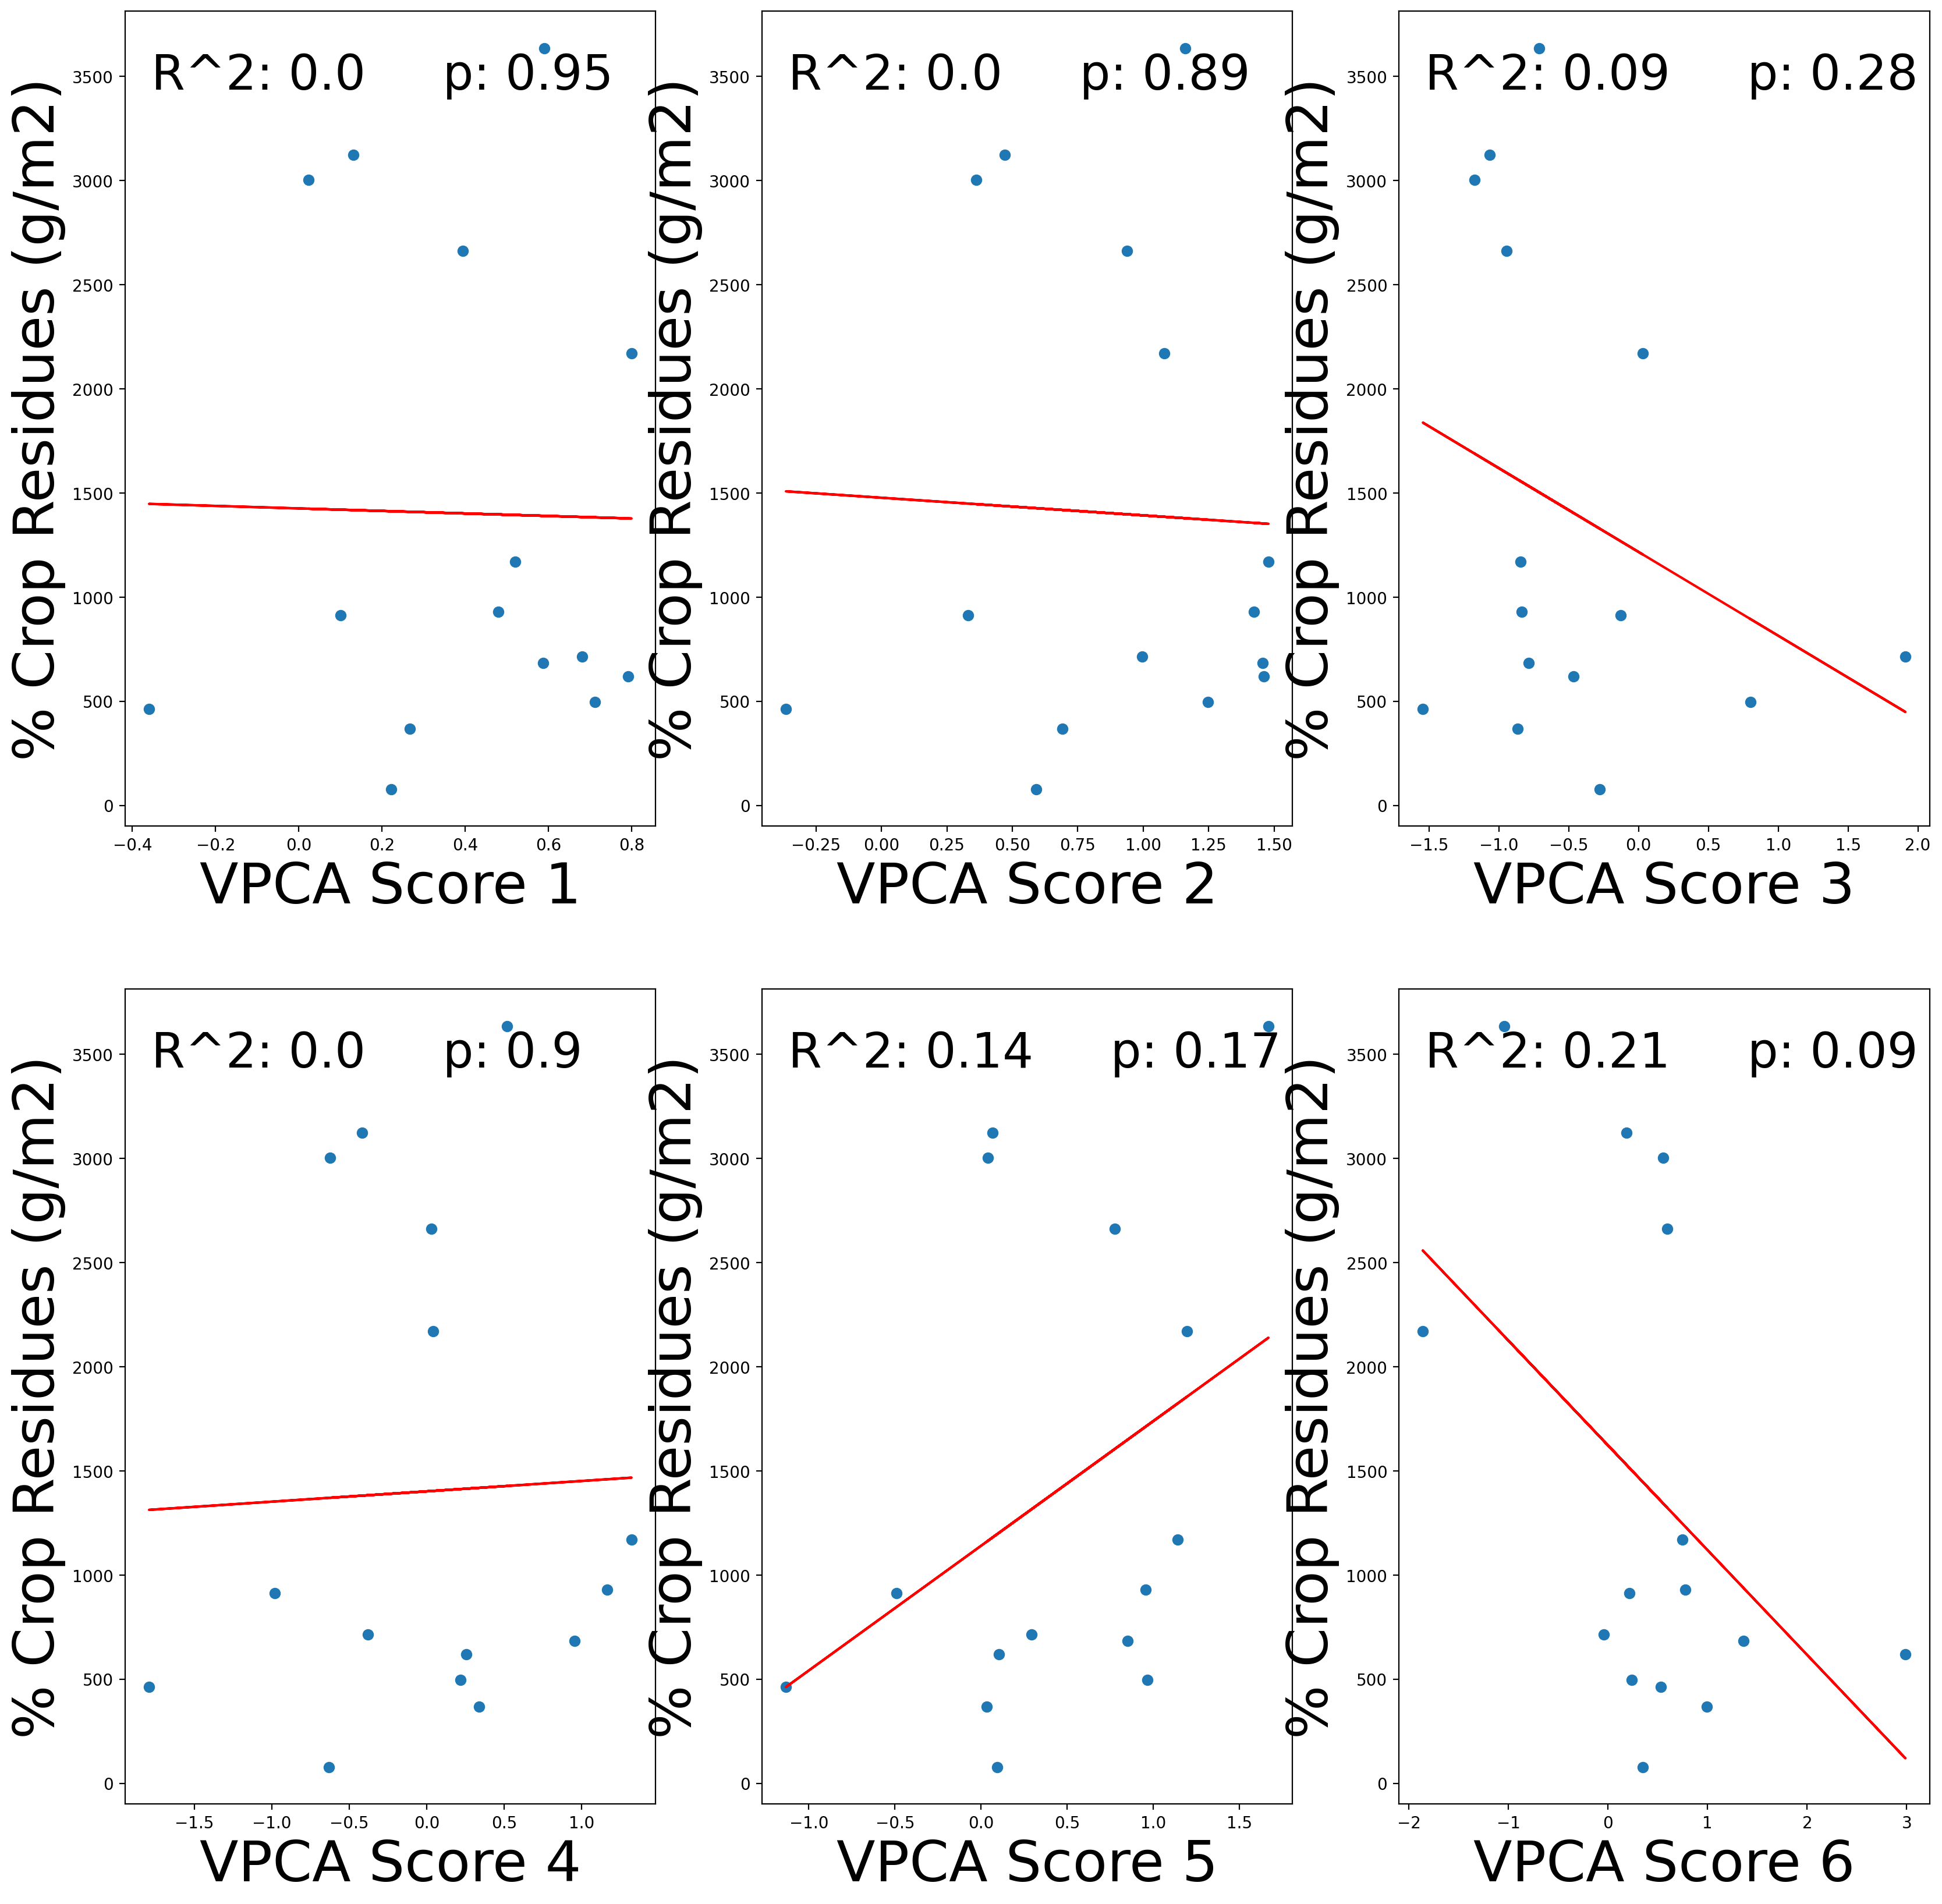

In [48]:
from scipy.stats import linregress
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(2,3 , figsize= (20,20))
ax[0,0].scatter(scores_res_all ['6VPCA Score 1'], residue_selected['g/m2'])
slope, intercept, r_value, p_value, std_err = linregress(scores_res_all['6VPCA Score 1'].astype(float), residue_selected['g/m2'].astype(float))
ax[0,0].plot(scores_res_all['6VPCA Score 1'], intercept + slope*scores_res_all['6VPCA Score 1'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,0].text(0.05, 0.95, text1, transform=ax[0,0].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,0].set_ylabel('% Crop Residues (g/m2)',fontsize=35)
ax[0,0].set_xlabel('VPCA Score 1',fontsize=35)




ax[0,1].scatter(scores_res_all ['6VPCA Score 2'], residue_selected['g/m2'])
slope, intercept, r_value, p_value, std_err = linregress(scores_res_all['6VPCA Score 2'].astype(float), residue_selected['g/m2'].astype(float))
ax[0,1].plot(scores_res_all['6VPCA Score 2'], intercept + slope*scores_res_all['6VPCA Score 2'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,1].text(0.05, 0.95, text1, transform=ax[0,1].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,1].set_ylabel('% Crop Residues (g/m2)',fontsize=35)
ax[0,1].set_xlabel('VPCA Score 2',fontsize=35)

ax[0,2].scatter(scores_res_all ['6VPCA Score 3'], residue_selected['g/m2'])
slope, intercept, r_value, p_value, std_err = linregress(scores_res_all['6VPCA Score 3'].astype(float), residue_selected['g/m2'].astype(float))
ax[0,2].plot(scores_res_all['6VPCA Score 3'], intercept + slope*scores_res_all['6VPCA Score 3'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[0,2].text(0.05, 0.95, text1, transform=ax[0,2].transAxes,
     fontsize=30, verticalalignment='top')
ax[0,2].set_ylabel('% Crop Residues (g/m2)',fontsize=35)
ax[0,2].set_xlabel('VPCA Score 3',fontsize=35)


ax[1,0].scatter(scores_res_all ['6VPCA Score 4'], residue_selected['g/m2'])
slope, intercept, r_value, p_value, std_err = linregress(scores_res_all['6VPCA Score 4'].astype(float), residue_selected['g/m2'].astype(float))
ax[1,0].plot(scores_res_all['6VPCA Score 4'], intercept + slope*scores_res_all['6VPCA Score 4'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,0].text(0.05, 0.95, text1, transform=ax[1,0].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,0].set_ylabel('% Crop Residues (g/m2)',fontsize=35)
ax[1,0].set_xlabel('VPCA Score 4',fontsize=35)


ax[1,1].scatter(scores_res_all ['6VPCA Score 5'], residue_selected['g/m2'])
slope, intercept, r_value, p_value, std_err = linregress(scores_res_all['6VPCA Score 5'].astype(float), residue_selected['g/m2'].astype(float))
ax[1,1].plot(scores_res_all['6VPCA Score 5'], intercept + slope*scores_res_all['6VPCA Score 5'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,1].text(0.05, 0.95, text1, transform=ax[1,1].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,1].set_ylabel('% Crop Residues (g/m2)',fontsize=35)
ax[1,1].set_xlabel('VPCA Score 5',fontsize=35)

ax[1,2].scatter(scores_res_all ['6VPCA Score 6'], residue_selected['g/m2'])
slope, intercept, r_value, p_value, std_err = linregress(scores_res_all['6VPCA Score 6'].astype(float), residue_selected['g/m2'].astype(float))
ax[1,2].plot(scores_res_all['6VPCA Score 6'], intercept + slope*scores_res_all['6VPCA Score 6'], 'r', label='fitted line')

text1 = "R^2: " + str(round(r_value**2,2)) + "     p: " + str(round(p_value,2))
ax[1,2].text(0.05, 0.95, text1, transform=ax[1,2].transAxes,
     fontsize=30, verticalalignment='top')
ax[1,2].set_ylabel('% Crop Residues (g/m2)',fontsize=35)
ax[1,2].set_xlabel('VPCA Score 6',fontsize=35)




In [ ]:
fig = px.scatter(x=LynnW_Res["6VPCA Score 2"], y=LW["g/m2"],  trendline="ols")
fig.show()

results = px.get_trendline_results(fig)
print(results)


                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


0.013480160821764398

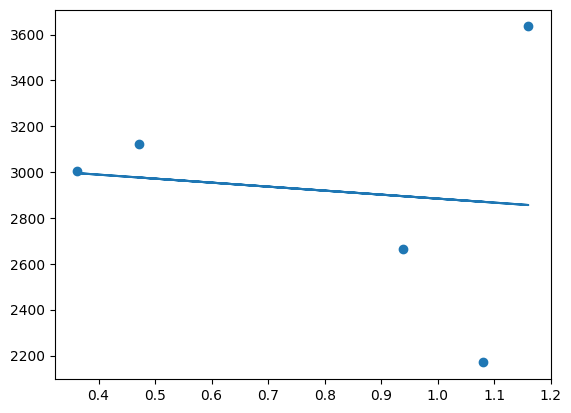

In [ ]:
from sklearn.metrics import r2_score
plt.scatter(LynnW_Res["6VPCA Score 2"], LW["g/m2"])
z = np.polyfit(LynnW_Res["6VPCA Score 2"], LW["g/m2"], 1)
p = np.poly1d(z)
plt.plot(LynnW_Res["6VPCA Score 2"],p(LynnW_Res["6VPCA Score 2"]))
r2_score(LW["g/m2"],p(LynnW_Res["6VPCA Score 2"]))

0.3379393411341036

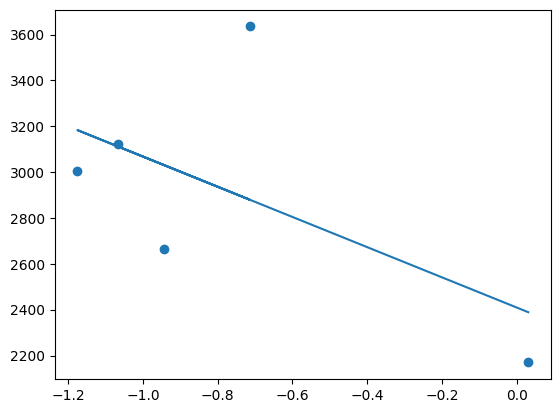

In [ ]:
from sklearn.metrics import r2_score
plt.scatter(LynnW_Res["6VPCA Score 3"], LW["g/m2"])
z = np.polyfit(LynnW_Res["6VPCA Score 3"], LW["g/m2"], 1)
p = np.poly1d(z)
plt.plot(LynnW_Res["6VPCA Score 3"],p(LynnW_Res["6VPCA Score 3"]))
r2_score(LW["g/m2"],p(LynnW_Res["6VPCA Score 3"]))

0.04098330876114853

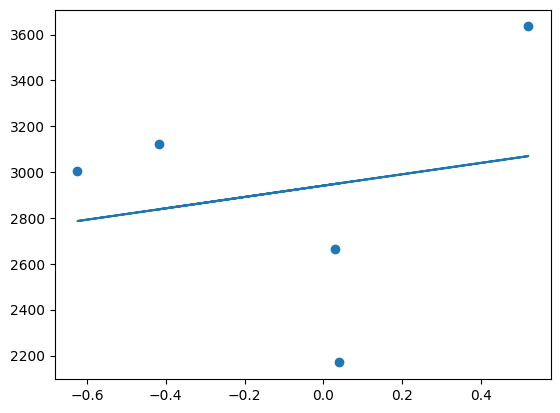

In [ ]:
from sklearn.metrics import r2_score
plt.scatter(LynnW_Res["6VPCA Score 4"], LW["g/m2"])
z = np.polyfit(LynnW_Res["6VPCA Score 4"], LW["g/m2"], 1)
p = np.poly1d(z)
plt.plot(LynnW_Res["6VPCA Score 4"],p(LynnW_Res["6VPCA Score 4"]))
r2_score(LW["g/m2"],p(LynnW_Res["6VPCA Score 4"]))

0.005923987252579255

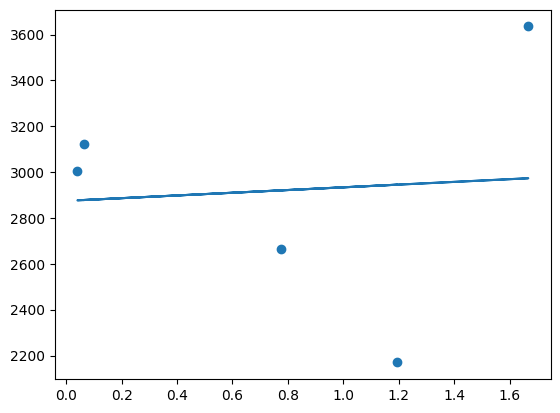

In [ ]:
from sklearn.metrics import r2_score
plt.scatter(LynnW_Res["6VPCA Score 5"], LW["g/m2"])
z = np.polyfit(LynnW_Res["6VPCA Score 5"], LW["g/m2"], 1)
p = np.poly1d(z)
plt.plot(LynnW_Res["6VPCA Score 5"],p(LynnW_Res["6VPCA Score 5"]))
r2_score(LW["g/m2"],p(LynnW_Res["6VPCA Score 5"]))

0.05887032022407834

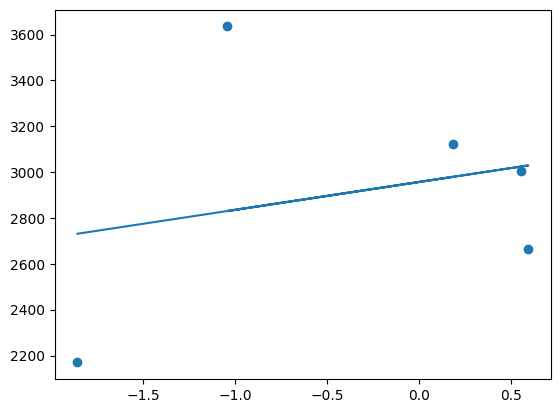

In [ ]:
from sklearn.metrics import r2_score
plt.scatter(LynnW_Res["6VPCA Score 6"], LW["g/m2"])
z = np.polyfit(LynnW_Res["6VPCA Score 6"], LW["g/m2"], 1)
p = np.poly1d(z)
plt.plot(LynnW_Res["6VPCA Score 6"],p(LynnW_Res["6VPCA Score 6"]))
r2_score(LW["g/m2"],p(LynnW_Res["6VPCA Score 6"]))

In [ ]:
JB = scores[scores['Sample'].str.contains('JB')]
JB_Res = JB[JB["sample type"].str.contains("Corn Res")]
JB_Res

,Sample,sample type,6VPCA Score 1,6VPCA Score 2,6VPCA Score 3,6VPCA Score 4,6VPCA Score 5,6VPCA Score 6
3,JB-5,Corn Res,0.22135,0.59156,-0.27654,-0.63017,0.09259,0.34682
4,JB-4,Corn Res,-0.36003,-0.36478,-1.54492,-1.79321,-1.13306,0.53164
5,JB-3,Corn Res,0.10088,0.33024,-0.12889,-0.98110,-0.49311,0.21719
6,JB-2,Corn Res,0.68073,0.99558,1.91077,-0.37851,0.29252,-0.04124
7,JB-1,Corn Res,0.71224,1.24818,0.79963,0.21658,0.96426,0.23944


In [ ]:
KB = scores[scores['Sample'].str.contains('KB')]
KB_Res = KB[KB["sample type"].str.contains("Corn Res")]
KB_Res

,Sample,sample type,6VPCA Score 1,6VPCA Score 2,6VPCA Score 3,6VPCA Score 4,6VPCA Score 5,6VPCA Score 6
0,KB-5,Corn Res,0.58711,1.45673,-0.78512,0.95528,0.85001,1.35848
1,KB-3,Corn Res,0.47937,1.42302,-0.83547,1.16594,0.95517,0.77655
2,KB-1,Corn Res,0.51947,1.47856,-0.84628,1.32242,1.13929,0.74541


In [ ]:
JB_KB =pd.read_excel(residue, "JB_KB")
JB_KB

,Bag#,site,Sample or Bag #,dry weight g,Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,Unnamed: 8,CW002,bag weight (g),g/m2
0,101,kb4,HWHF22_29,85.91,5/22/2023,see expt (5/30/2023) see page 5),0.0625,residue,NaN,NaN,29.7,899.36
1,102,kb1,HWHF22_26,102.71,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,1171.36
2,121,kb5,HWHF22_30,72.89,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.1,684.64
3,122,kb2,HWHF22_27,108.65,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.1,1256.80
4,103,jb21,HWHF22_21,60.53,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,496.48
5,104,jb24,HWHF22_24,58.12,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.2,462.72
6,105,jb25,HWHF22_25,34.38,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,78.08
7,111,jb23,HWHF22_23,86.86,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.7,914.56
8,112,jb22,HWHF22_22,74.01,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.4,713.76
9,123,kb3,HWHF22_28,87.97,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.8,930.72


In [ ]:
JB_KB_Sorted = JB_KB.sort_values(by=['site'], ascending = False)
JB_KB_Sorted

,Bag#,site,Sample or Bag #,dry weight g,Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,Unnamed: 8,CW002,bag weight (g),g/m2
2,121,kb5,HWHF22_30,72.89,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.1,684.64
0,101,kb4,HWHF22_29,85.91,5/22/2023,see expt (5/30/2023) see page 5),0.0625,residue,NaN,NaN,29.7,899.36
9,123,kb3,HWHF22_28,87.97,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.8,930.72
3,122,kb2,HWHF22_27,108.65,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.1,1256.80
1,102,kb1,HWHF22_26,102.71,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,1171.36
6,105,jb25,HWHF22_25,34.38,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,78.08
5,104,jb24,HWHF22_24,58.12,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.2,462.72
7,111,jb23,HWHF22_23,86.86,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.7,914.56
8,112,jb22,HWHF22_22,74.01,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.4,713.76
4,103,jb21,HWHF22_21,60.53,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,496.48


In [ ]:
JB_residue= JB_KB_Sorted[JB_KB_Sorted["site"].str.contains('jb')]
JB_residue

,Bag#,site,Sample or Bag #,dry weight g,Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,Unnamed: 8,CW002,bag weight (g),g/m2
6,105,jb25,HWHF22_25,34.38,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,78.08
5,104,jb24,HWHF22_24,58.12,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.2,462.72
7,111,jb23,HWHF22_23,86.86,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.7,914.56
8,112,jb22,HWHF22_22,74.01,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.4,713.76
4,103,jb21,HWHF22_21,60.53,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,496.48


0.01159780848365688

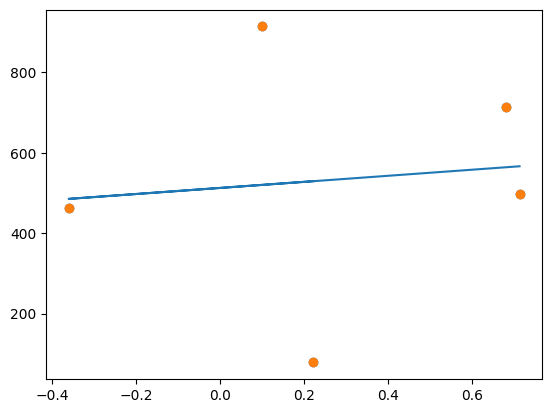

In [ ]:
plt.scatter( JB_Res['6VPCA Score 1'],JB_residue["g/m2"])

from sklearn.metrics import r2_score
plt.scatter(JB_Res['6VPCA Score 1'], JB_residue["g/m2"])
z = np.polyfit(JB_Res['6VPCA Score 1'], JB_residue["g/m2"], 1)
p = np.poly1d(z)
plt.plot(JB_Res['6VPCA Score 1'],p(JB_Res['6VPCA Score 1']))
r2_score(JB_residue["g/m2"],p(JB_Res['6VPCA Score 1']))

0.0004461618407280987

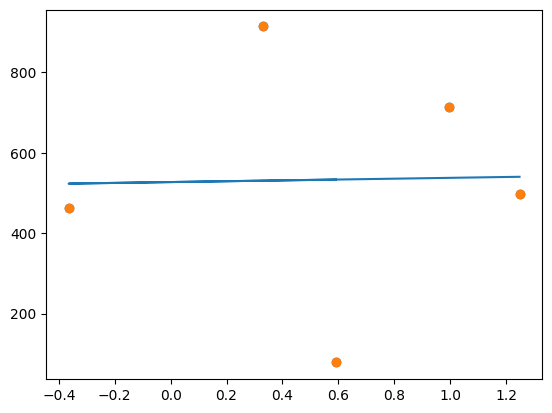

In [ ]:
plt.scatter( JB_Res['6VPCA Score 2'],JB_residue["g/m2"])

from sklearn.metrics import r2_score
plt.scatter(JB_Res['6VPCA Score 2'], JB_residue["g/m2"])
z = np.polyfit(JB_Res['6VPCA Score 2'], JB_residue["g/m2"], 1)
p = np.poly1d(z)
plt.plot(JB_Res['6VPCA Score 2'],p(JB_Res['6VPCA Score 2']))
r2_score(JB_residue["g/m2"],p(JB_Res['6VPCA Score 2']))

0.0964586537546398

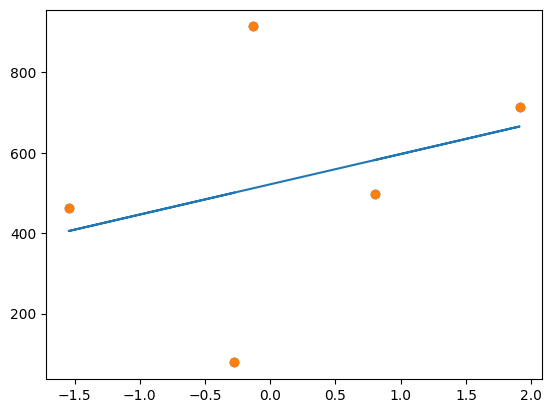

In [ ]:
plt.scatter( JB_Res['6VPCA Score 3'],JB_residue["g/m2"])

from sklearn.metrics import r2_score
plt.scatter(JB_Res['6VPCA Score 3'], JB_residue["g/m2"])
z = np.polyfit(JB_Res['6VPCA Score 3'], JB_residue["g/m2"], 1)
p = np.poly1d(z)
plt.plot(JB_Res['6VPCA Score 3'],p(JB_Res['6VPCA Score 3']))
r2_score(JB_residue["g/m2"],p(JB_Res['6VPCA Score 3']))

0.0016208388256804263

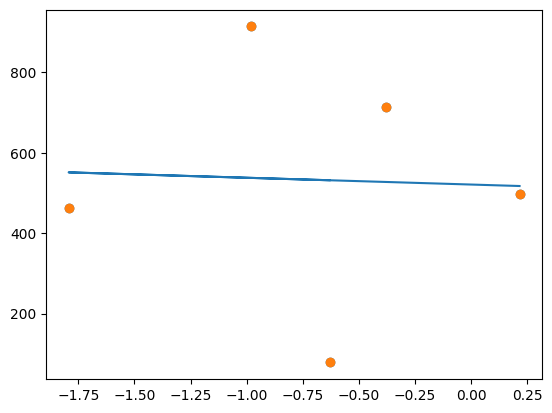

In [ ]:
plt.scatter( JB_Res['6VPCA Score 4'],JB_residue["g/m2"])

from sklearn.metrics import r2_score
plt.scatter(JB_Res['6VPCA Score 4'], JB_residue["g/m2"])
z = np.polyfit(JB_Res['6VPCA Score 4'], JB_residue["g/m2"], 1)
p = np.poly1d(z)
plt.plot(JB_Res['6VPCA Score 4'],p(JB_Res['6VPCA Score 4']))
r2_score(JB_residue["g/m2"],p(JB_Res['6VPCA Score 4']))

0.017805511149338482

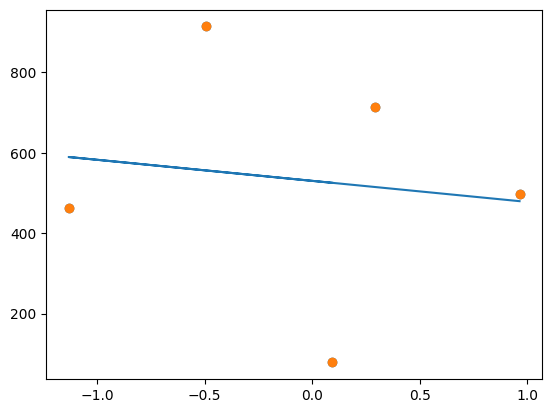

In [ ]:
plt.scatter( JB_Res['6VPCA Score 5'],JB_residue["g/m2"])

from sklearn.metrics import r2_score
plt.scatter(JB_Res['6VPCA Score 5'], JB_residue["g/m2"])
z = np.polyfit(JB_Res['6VPCA Score 5'], JB_residue["g/m2"], 1)
p = np.poly1d(z)
plt.plot(JB_Res['6VPCA Score 5'],p(JB_Res['6VPCA Score 5']))
r2_score(JB_residue["g/m2"],p(JB_Res['6VPCA Score 5']))

In [ ]:
KB_residue= JB_KB_Sorted[JB_KB_Sorted["site"].str.contains('kb')]
KB_residue

,Bag#,site,Sample or Bag #,dry weight g,Date,Notes,Area Sampled (see notes and pics) (m2),Sample type,Unnamed: 8,CW002,bag weight (g),g/m2
2,121,kb5,HWHF22_30,72.89,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.1,684.64
0,101,kb4,HWHF22_29,85.91,5/22/2023,see expt (5/30/2023) see page 5),0.0625,residue,NaN,NaN,29.7,899.36
9,123,kb3,HWHF22_28,87.97,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.8,930.72
3,122,kb2,HWHF22_27,108.65,5/22/2023,NaN,0.0625,residue,NaN,NaN,30.1,1256.80
1,102,kb1,HWHF22_26,102.71,5/22/2023,NaN,0.0625,residue,NaN,NaN,29.5,1171.36


In [ ]:
plt.scatter(KB_Res['6VPCA Score 1'],KB_residue["g/m2"])

NameError: name 'plt' is not defined